In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/black-friday-sales-data/train.csv


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [6]:
df = pd.read_csv("/kaggle/input/black-friday-sales-data/train.csv")
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [7]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [10]:
df.duplicated().value_counts()

False    550068
Name: count, dtype: int64

total 550068 number of rows data including NaN value with no duplicated data. 

So, first task to convert the given data into useful data.

In [12]:
#Convertig all the columns name in the lowercase for easy use

df.rename(columns=str.lower, inplace=True)

In [14]:
df.columns

Index(['user_id', 'product_id', 'gender', 'age', 'occupation', 'city_category',
       'stay_in_current_city_years', 'marital_status', 'product_category_1',
       'product_category_2', 'product_category_3', 'purchase'],
      dtype='object')

## Procecssing each column Individually


In [15]:
df.user_id

0         1000001
1         1000001
2         1000001
3         1000001
4         1000002
           ...   
550063    1006033
550064    1006035
550065    1006036
550066    1006038
550067    1006039
Name: user_id, Length: 550068, dtype: int64

In [16]:
df.product_id


0         P00069042
1         P00248942
2         P00087842
3         P00085442
4         P00285442
            ...    
550063    P00372445
550064    P00375436
550065    P00375436
550066    P00375436
550067    P00371644
Name: product_id, Length: 550068, dtype: object

In [17]:
df.gender.unique()

array(['F', 'M'], dtype=object)

In [18]:
df.head()

,user_id,product_id,gender,age,occupation,city_category,stay_in_current_city_years,marital_status,product_category_1,product_category_2,product_category_3,purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [19]:
df.age.unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [20]:
df.occupation.unique(),len(df.occupation.unique()),df.occupation.dtype

(array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
         5, 14, 13,  6]),
 21,
 dtype('int64'))

In [21]:
df.city_category.unique()

array(['A', 'C', 'B'], dtype=object)

In [22]:
df.stay_in_current_city_years.unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

We have customer who are staying in city from '0', '1', '2', '3', '4+' years.

We can replace '4+' years to '4' so we can get excat number and we can assume that those customer are belonging to current city form 4 years are staying more than 4 years in the current city.

In [23]:
df.stay_in_current_city_years = df.stay_in_current_city_years.replace("4+",'4').astype(int)
df.stay_in_current_city_years.unique()

array([2, 4, 3, 1, 0])

In [25]:
df.marital_status.unique()

array([0, 1])

* 0 = single 
* 1 = married

In [26]:
df[['product_category_1','product_category_2','product_category_3']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 3 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   product_category_1  550068 non-null  int64  
 1   product_category_2  376430 non-null  float64
 2   product_category_3  166821 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 12.6 MB


In [27]:
df.head()

,user_id,product_id,gender,age,occupation,city_category,stay_in_current_city_years,marital_status,product_category_1,product_category_2,product_category_3,purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4,0,8,NaN,NaN,7969


See we have two columns Gender and occupation. By seeing these two columns we can analyse that which column giving us a useful values to fill the nan values of product categories.

Ex.:

By seeing the 'age' column we can analyze that which product category are mostely used by the perticular age of customer and we can fill that category value inplace of nan values. By seaing the 'occupation' column we can analyze that which product category are mostely used by the perticular customers depends on their occupation and we can fill that category value inplace of nan values. In the next steps let's see that which column giving us most useful values.

In [29]:
a = df.groupby('age')['product_category_2'].agg(pd.Series.mode)
b = df.groupby('age')['product_category_3'].agg(pd.Series.mode)
c = df.groupby('occupation')['product_category_2'].agg(pd.Series.mode)
d = df.groupby('occupation')['product_category_3'].agg(pd.Series.mode)

#mode gives most repeated value



In [31]:
c=df.groupby('occupation')['product_category_2'].agg(pd.Series.mode)
a

age
0-17     4.0
18-25    8.0
26-35    8.0
36-45    8.0
46-50    8.0
51-55    8.0
55+      8.0
Name: product_category_2, dtype: float64

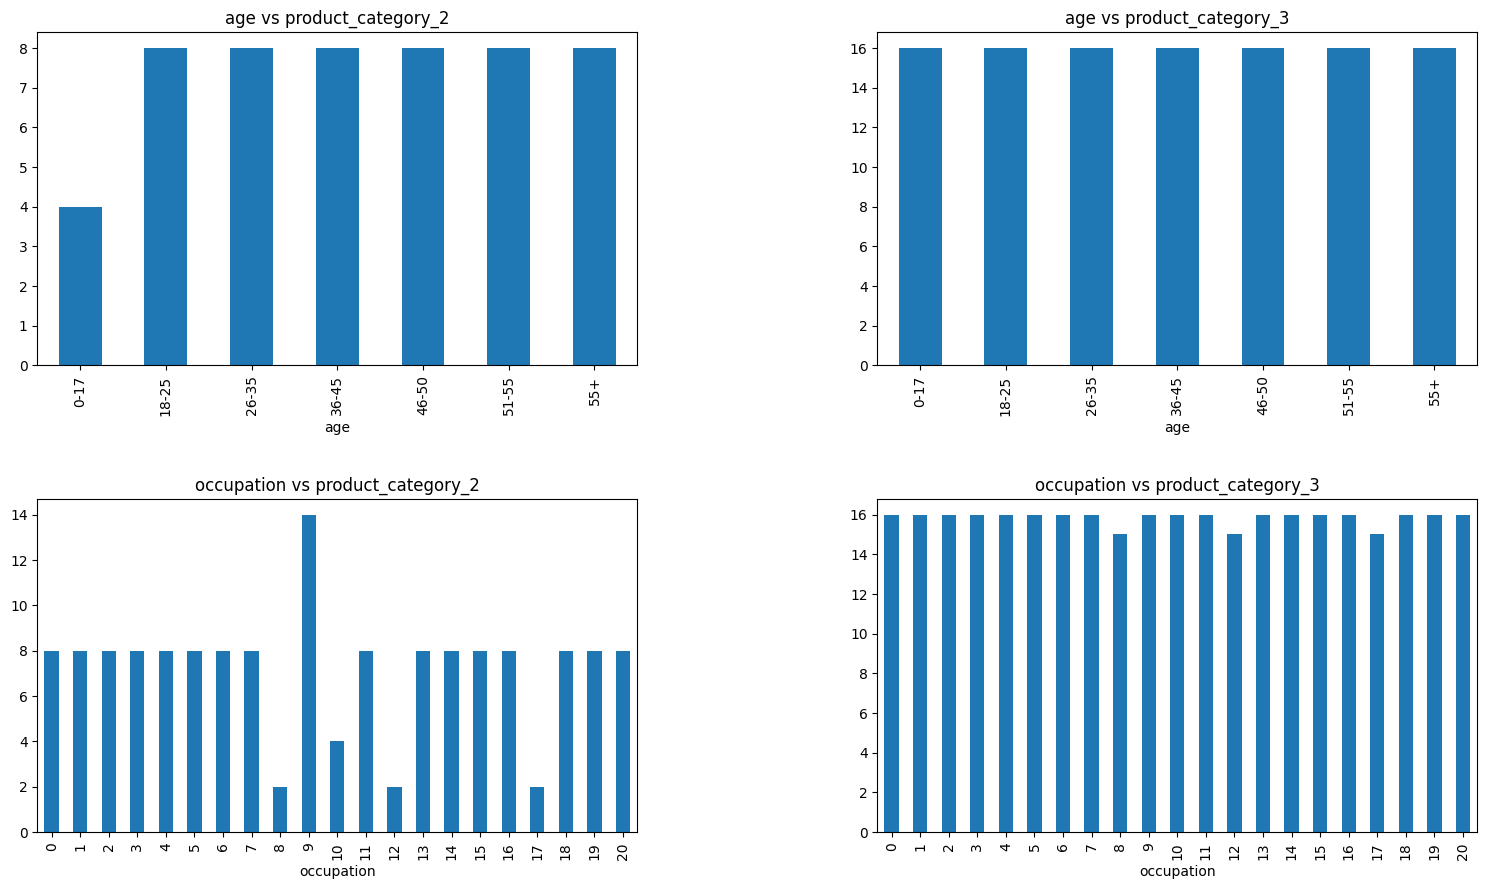

In [32]:
plt.figure(figsize=(18,10))
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)
plt.subplot(2,2,1)
a.plot(kind='bar', title="age vs product_category_2")
plt.subplot(2,2,2)
b.plot(kind='bar', title="age vs product_category_3")
plt.subplot(2,2,3)
c.plot(kind='bar', title="occupation vs product_category_2")
plt.subplot(2,2,4)
d.plot(kind='bar', title="occupation vs product_category_3")
plt.show()

By comparing both 'age' and 'occupation' colums we can see that on the basis of occupation we are getting more and differnt Product_categories which are mostly repeated.

So, we can fill the nan product_category values corresponding to customer occupation.

In the next step to fill this NaN values let's try to write function which we can use for each product_category.

Insted of repeat the code for each product_category we can use code reusability concept here.

In [33]:
def fillNanCategory(categoryCol):
    x=df.groupby('occupation')[categoryCol].agg(pd.Series.mode)
    
    for i,j in zip(x.index, x):
        df.loc[df['occupation']==i,categoryCol]=df.loc[df['occupation']==i,categoryCol].fillna(j)

In [36]:
fillNanCategory('product_category_1')
fillNanCategory('product_category_2')
fillNanCategory('product_category_3')
df.product_category_1 = df.product_category_1.astype(float)

In [37]:
df[['product_category_1','product_category_2','product_category_3']].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 3 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   product_category_1  550068 non-null  float64
 1   product_category_2  550068 non-null  float64
 2   product_category_3  550068 non-null  float64
dtypes: float64(3)
memory usage: 12.6 MB


In [38]:
df.head()

,user_id,product_id,gender,age,occupation,city_category,stay_in_current_city_years,marital_status,product_category_1,product_category_2,product_category_3,purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3.0,4.0,16.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1.0,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12.0,4.0,16.0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12.0,14.0,16.0,1057
4,1000002,P00285442,M,55+,16,C,4,0,8.0,8.0,16.0,7969


In [39]:
df.purchase.unique()

array([ 8370, 15200,  1422, ...,   135,   123,   613])

In [40]:
df.purchase.isnull().count()

550068

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   user_id                     550068 non-null  int64  
 1   product_id                  550068 non-null  object 
 2   gender                      550068 non-null  object 
 3   age                         550068 non-null  object 
 4   occupation                  550068 non-null  int64  
 5   city_category               550068 non-null  object 
 6   stay_in_current_city_years  550068 non-null  int64  
 7   marital_status              550068 non-null  int64  
 8   product_category_1          550068 non-null  float64
 9   product_category_2          550068 non-null  float64
 10  product_category_3          550068 non-null  float64
 11  purchase                    550068 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 50.4+ MB


In [42]:
# Saivng cleaned dataset in output directory.
    
df.to_csv('./df_clean_data.csv')


Therefore, we cleaned our data successfully without losing single value, we got total 550068 values.

## Data Visualization 

In [43]:
df.head()

,user_id,product_id,gender,age,occupation,city_category,stay_in_current_city_years,marital_status,product_category_1,product_category_2,product_category_3,purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3.0,4.0,16.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1.0,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12.0,4.0,16.0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12.0,14.0,16.0,1057
4,1000002,P00285442,M,55+,16,C,4,0,8.0,8.0,16.0,7969


## Distribution and Outliers of 'purchase'

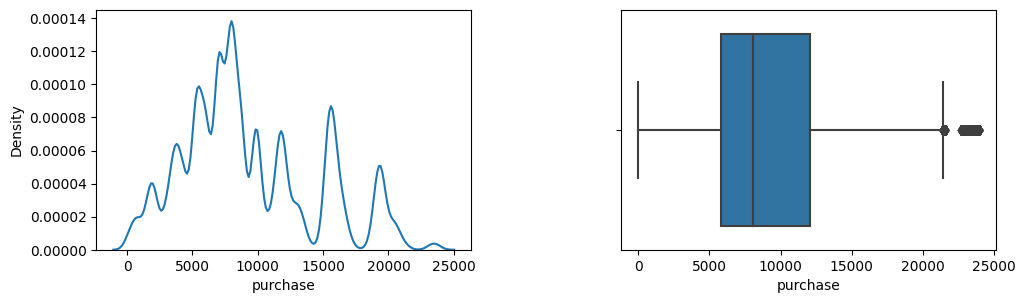

In [49]:
plt.figure(figsize=(10,3))
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=1,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4
                   )
plt.subplot(1,2,1)
sns.kdeplot(x='purchase', data=df)
plt.subplot(1,2,2)
sns.boxplot(x='purchase', data=df)
plt.show()

We observed that most of the purcahse value is between 5000 to 10000.

Get purchase details of Male and Female customers

Find which kind of customer visits more frequently ? Male or Female?

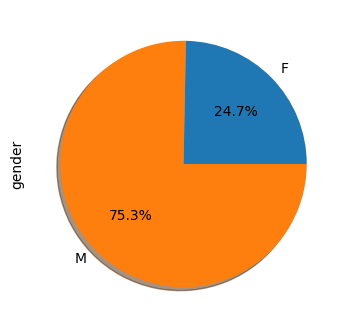

In [53]:
df.groupby('gender').agg({'gender':'count'}).gender.plot(kind='pie', autopct='%1.1f%%', figsize=(5,4), shadow=True)
plt.show()

 75% Male customers visit frequently

## Purchase Distribution of 'Male' and 'Female' customers.

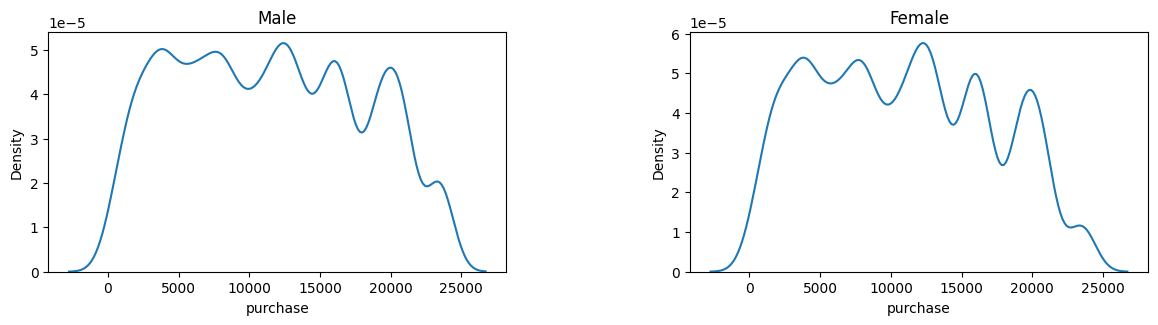

In [55]:
plt.figure(figsize=(10,3))
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=1.2,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4
                   )

ma=df[df['gender']=='M'].value_counts('purchase').reset_index()
fe=df[df['gender']=='F'].value_counts('purchase').to_frame()

plt.subplot(1,2,1)
sns.kdeplot(x='purchase', data=ma).set_title("Male")

plt.subplot(1,2,2)
sns.kdeplot(x='purchase', data=fe).set_title("Female")

plt.show()


Find which kind of customer purchasing more ? Male or Female?

,gender,purchase
0,F,1186232642
1,M,3909580100


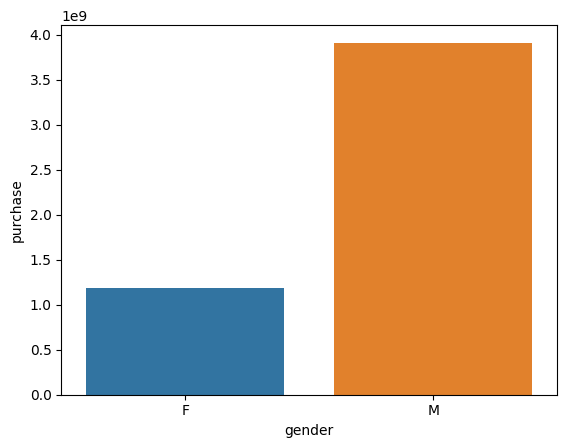

In [57]:
p=df.groupby('gender').agg({'purchase':sum}).reset_index()
sns.barplot(x='gender', y='purchase', data=p)
p

'Male' customers are purchasing more

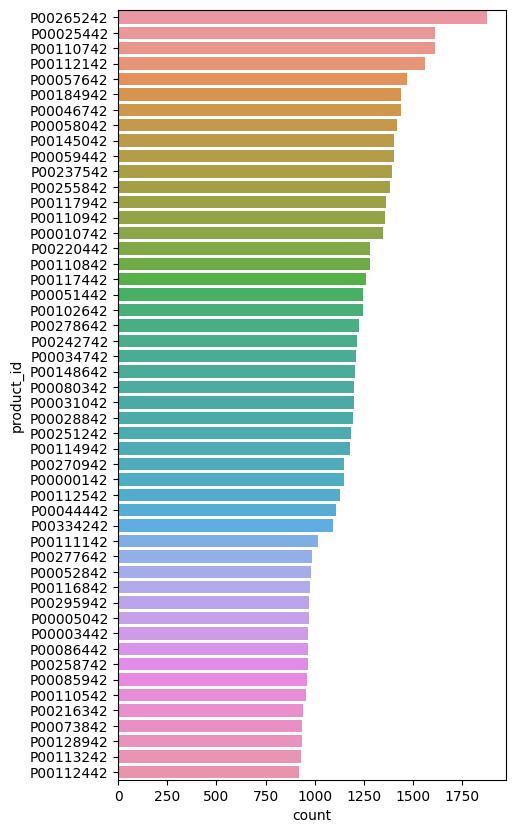

In [58]:
p_id=df.value_counts('product_id').sort_values(ascending=False).head(50)
plt.figure(figsize=(5,10))
sns.barplot(y=p_id.index,x=p_id)
plt.show()

## Purchase Distribution of Married and UnMarried customers.

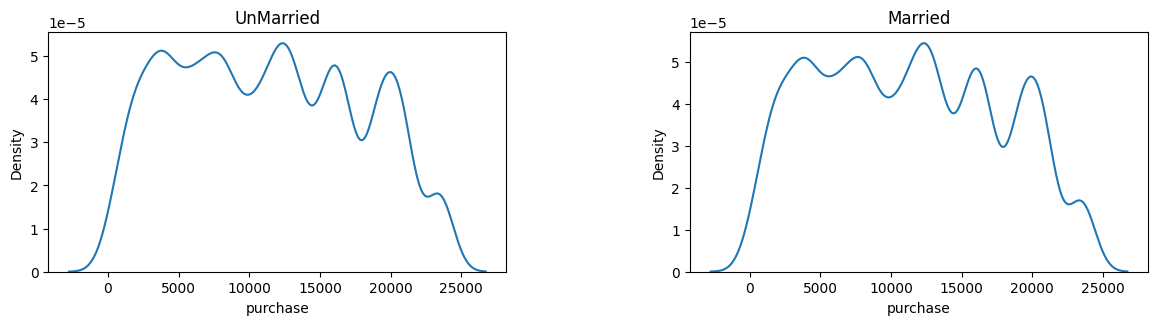

In [59]:
# married and unmarried people distribution w purchase
ump = df[df['marital_status']==0].value_counts('purchase').to_frame()
mp = df[df['marital_status']==1].value_counts('purchase').to_frame()

plt.figure(figsize=(10,3))
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=1.2,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4
                   )

plt.subplot(1,2,1)
sns.kdeplot(x='purchase',data=ump).set_title('UnMarried')
plt.subplot(1,2,2)
sns.kdeplot(x='purchase',data=mp).set_title('Married')
plt.show()

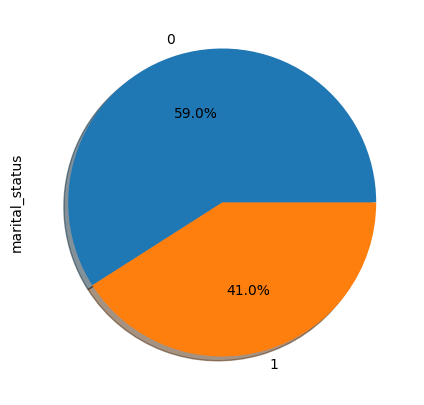

In [60]:
df.groupby('marital_status').agg({'marital_status':'count'}).marital_status.plot(kind='pie',autopct='%1.1f%%',figsize=(5,5),shadow=True)
plt.show()

Find which customer purchasing more (Married or UnMarried) and Top 10 products purcahsed by them



,gender,marital_status,purchase
0,F,0,684154127
1,F,1,502078515
2,M,0,2324773320
3,M,1,1584806780


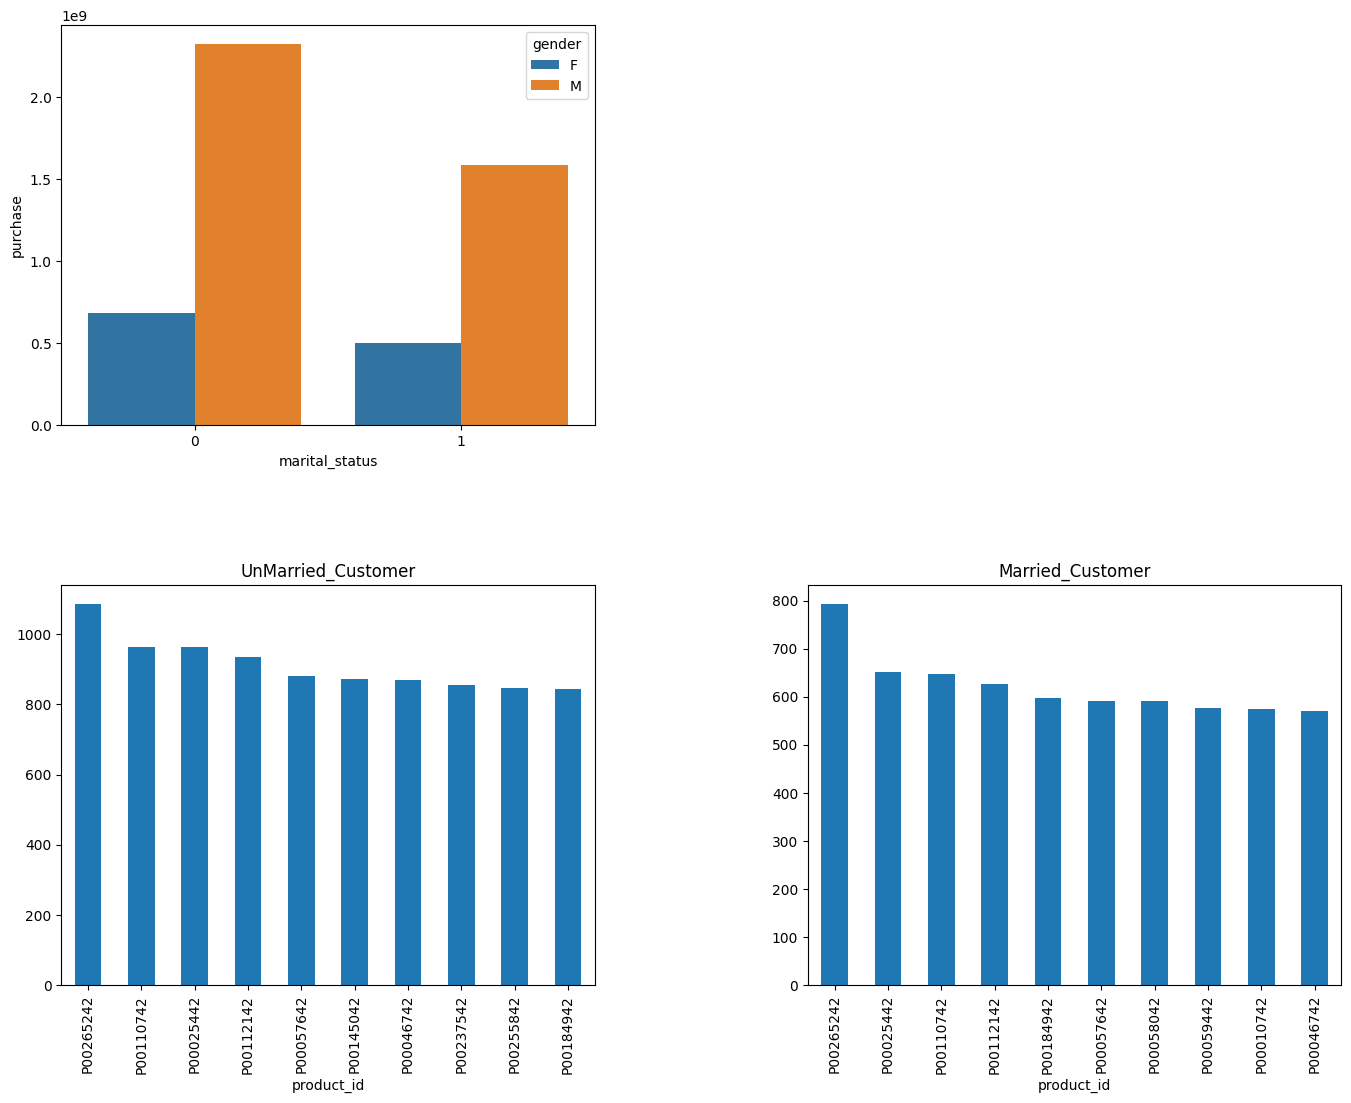

In [63]:
m_um_p =df.groupby(['gender','marital_status']).agg({'purchase':sum}).reset_index()
um=df[df['marital_status']==0].value_counts('product_id').nlargest(10)
m=df[df['marital_status']==1].value_counts('product_id').nlargest(10)

plt.subplots_adjust(left=1,
                    bottom=1,
                    right=3,
                    top=3,
                    wspace=0.4,
                    hspace=0.4)
plt.subplot(2,2,1)
sns.barplot(x='marital_status',y='purchase',hue='gender',data=m_um_p)

plt.subplot(2,2,3)
um.plot(x=um.index,y=um,kind='bar',title='UnMarried_Customer')

plt.subplot(2,2,4)
m.plot(x=m.index,y=m,kind='bar',title='Married_Customer')

m_um_p

In the above plot we can see that 'UnMarried' customers purchasing more than the 'Married' customers.

And BarPlot showing that top 10 Product Id's purshased by them frequently.